### 사분면 모델

- x: 주가 수익률(or 가격)
- y: 주가 거래량

현재 주가와 거래량이 사분면 상에서 어느 좌표에 위치해 있는지 확인

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

# 폰트를 AppleGothic으로 설정
plt.rcParams['font.family'] = 'AppleGothic'


In [3]:
# 1. 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-11-10')


[*********************100%%**********************]  1 of 1 completed


In [4]:
# 2. 주가수익률 계산
data['Price_Return'] = data['Adj Close'].pct_change()

# 3. 거래량 변화율 계산
data['Volume_Change'] = data['Volume'].pct_change()

In [19]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Price_Return,Volume_Change,Quadrant
Date,,,,,,,,,
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.088295,146322800,-0.009722,0.080029,2
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.662697,118387200,0.007968,-0.190918,4
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.320969,108872000,-0.004703,-0.080374,3
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.484352,132079200,0.016086,0.213160,1
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.045212,170108400,0.021241,0.287927,1


In [5]:
# 4. 결측치 제거
data = data.dropna()

In [6]:
# 5. 사분면 기준 설정 (평균을 기준으로 사분면 분할)
mean_price_return = data['Price_Return'].mean()
mean_volume_change = data['Volume_Change'].mean()

In [10]:
# 6. 각 사분면에 따라 라벨 할당
def assign_quadrant(row):
    """
    1사분면: 수익률과 거래량 둘 다 평균 이상인 상태
    2사분면: 수익률은 평균 수익률보다 낮으나 거래량은 평균 거래량보다 높은 상태
    3사분면: 수익률과 거래량 둘 다 평균보다 낮은 상태
    4사분면: 수익률은 평균 수익률보다 높으나 거래량은 평균 거래량보다 낮은 상태
    """
    if row['Price_Return'] >= mean_price_return and row['Volume_Change'] >= mean_volume_change:
        return 1  # 1사분면
    elif row['Price_Return'] < mean_price_return and row['Volume_Change'] >= mean_volume_change:
        return 2  # 2사분면
    elif row['Price_Return'] < mean_price_return and row['Volume_Change'] < mean_volume_change:
        return 3  # 3사분면
    else:
        return 4  # 4사분면
    
data['Quadrant'] = data.apply(assign_quadrant, axis=1)

/var/folders/yd/1_xwcyjj6z58p2vptxk1dwvm0000gn/T/ipykernel_87953/696821414.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quadrant'] = data.apply(assign_quadrant, axis=1)


/Users/kevincho/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


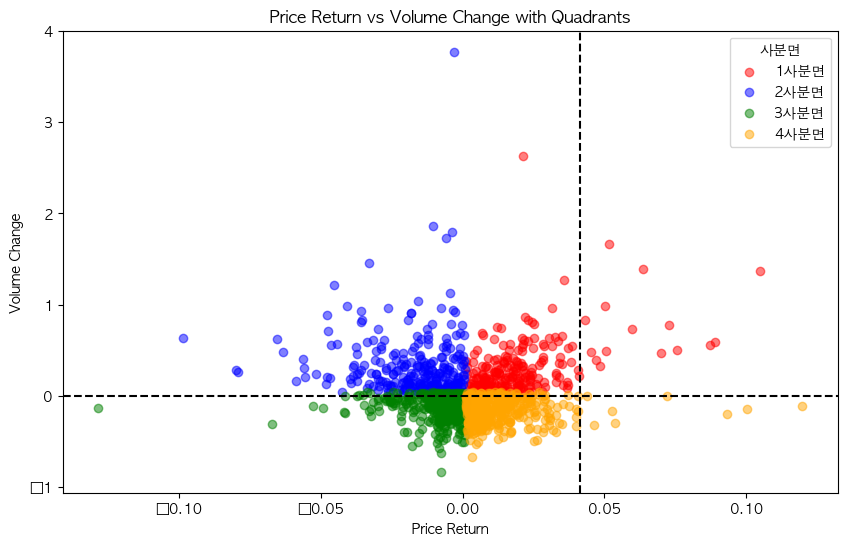

In [18]:
# 7. 데이터 시각화
plt.figure(figsize=(10, 6))
colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'orange'}
labels = {1: '1사분면', 2: '2사분면', 3: '3사분면', 4: '4사분면'}

# 각 사분면의 점을 플롯
for quadrant, color in colors.items():
    subset = data[data['Quadrant'] == quadrant]
    plt.scatter(subset['Price_Return'], subset['Volume_Change'], c=color, label=labels[quadrant], alpha=0.5)

# 기준선 추가
plt.axhline(mean_price_return, color='black', linestyle='--')
plt.axvline(mean_volume_change, color='black', linestyle='--')

# 그래프 설정
plt.xlabel('Price Return')
plt.ylabel('Volume Change')
plt.title('Price Return vs Volume Change with Quadrants')
plt.legend(title="사분면", loc="upper right")  # 범례 추가
plt.show()

In [9]:
data['Quadrant']

Date
2020-01-03    2
2020-01-06    4
2020-01-07    3
2020-01-08    1
2020-01-09    1
             ..
2024-11-04    3
2024-11-05    4
2024-11-06    2
2024-11-07    4
2024-11-08    3
Name: Quadrant, Length: 1222, dtype: int64